<a href="https://colab.research.google.com/github/prasad1482/Heart_disease_classification/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd


In [5]:
df=pd.read_csv('/content/heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


There is no NULL values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df['target'].value_counts()

,count
target,
1,526
0,499


We notice that 526 are suffering from heart disease and rest of 499 are not.


In [13]:
#Remove the target value and assign as y, normalization x using standardScaler
x=df.drop('target', axis=1)
y=df['target']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_data=scaler.fit_transform(x)

In [14]:
#split data into training(80%) and testing(20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled_data,y,test_size=0.2,random_state=42)

#Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
#lets predict y value
y_pred = lr.predict(x_test)

In [21]:
#Now evalute original to predicted values
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7951219512195122
[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [23]:
#after LogisticRegression we dindt get better result lets try with another model Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
y_pred_rf = rf.predict(x_test)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Cross validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Run 5-fold cross-validation
lr_scores = cross_val_score(lr, x_scaled_data, y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, x_scaled_data, y, cv=5, scoring='accuracy')

# Print average scores
print("Logistic Regression CV Accuracy:", lr_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())

Logistic Regression CV Accuracy: 0.8458536585365855
Random Forest CV Accuracy: 0.9970731707317073


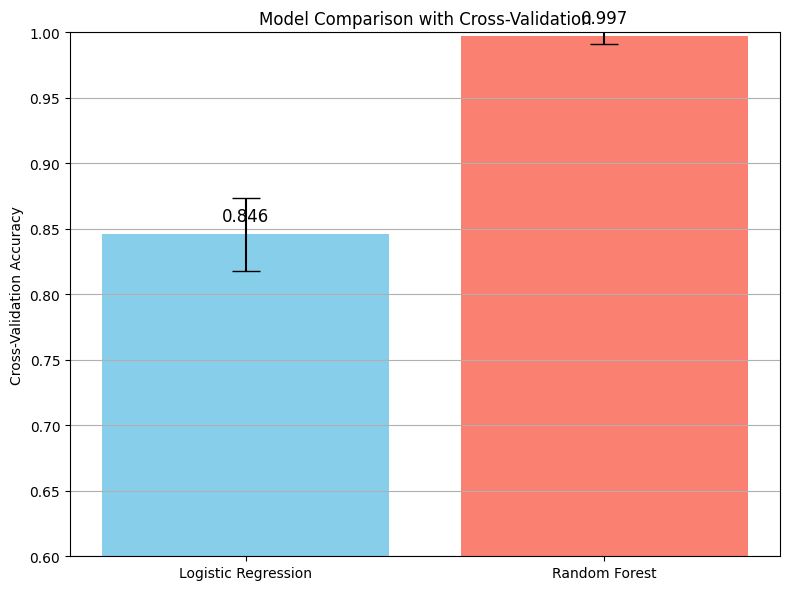

In [34]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
means = [lr_mean, rf_mean]
errors = [lr_std, rf_std]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, means, yerr=errors, capsize=10, color=['skyblue', 'salmon'])

plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Comparison with Cross-Validation')
plt.ylim(0.6, 1.0)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{height:.3f}', ha='center', fontsize=12)

plt.grid(axis='y')
plt.tight_layout()
plt.show()
